### News Headline Classification

####  Abhishek Naithani - c0871411
#### Karishma Shirsath - c0871245
#### Tejaswi Kalla - c0852124
#### Venkata Sai Charan Yerapasetty - c0863224


## Table of contents

1. [Libraries Used](#Libraries) 
2. [Web Scrapping the data](#data) 
3. [Converting the data to csv and loading it](#Convert) 
4. [Overview of the dataset](#Overview) 
5. [Preprocessing the text](#Text) 
6. [Visualization](#Visual) 
7. [Training and Testing](#Test)
8. [Modeling](#Model) 
11. [Verifying results](#Result)
 

## 1. Libraries Used <a class="anchor" id="Libraries"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
import matplotlib.pyplot as plt
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup
import random
from wordcloud import WordCloud
import os
from textblob import TextBlob
import re 
import string
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV

In [2]:
import warnings
warnings.filterwarnings("ignore")

## 2. Web Scrapping data <a class="anchor" id="data"></a>

<div class="alert alert-block alert-info">
    
We scrapped the data from two websites cbcnews and theglobalandmail websites in which we used beautifulsoap and selenium to     get the realistic data which contains news and headlines columns, we have taken only two columns as most of the work was         dependent on these and we felt the other columns like author,date of the article was not significant.
    
</div>

In [12]:
#list of the urls to scrape
url_list = [
    "https://www.cbc.ca/news/business",
    "https://www.cbc.ca/news/politics",
    "https://www.cbc.ca/news/entertainment",
    "https://www.cbc.ca/news/science",
    "https://www.cbc.ca/news/health",
    "https://www.cbc.ca/news/indigenous"
]

#Mapping of categories to url
category_mapping = {
    "https://www.cbc.ca/news/business": "Business",
    "https://www.cbc.ca/news/politics": "Politics",
    "https://www.cbc.ca/news/entertainment": "Entertainment",
    "https://www.cbc.ca/news/science": "Science",
    "https://www.cbc.ca/news/health": "Health",
    "https://www.cbc.ca/news/indigenous": "Indigenous"
}

coverpage_newslist = []

    #Function to Extract the news their categories from the page source.
    #Appends the news data to the coverpage_newslist.
    
def get_news(page_source, category):
    soup = BeautifulSoup(page_source, 'html.parser')
    news_titles = soup.find_all(class_='headline')
    try:
        for titles in news_titles:
            news_title = {
                'News': titles.text.strip(),
                'Category': category
            }
            coverpage_newslist.append(news_title)
            print(news_title)
    except AttributeError:
        pass

    
    #Function to Load the URL using Selenium WebDriver and retrieves the page source.
    #Clicks on the "Load More" button to fetch all news articles.
    #Calls the get_news function to extract the news data.
    
def scrape_news(url):
    category = category_mapping.get(url)
    if category:
        driver = webdriver.Chrome()
        driver.get(url)
        while True:
            try:
                #finding and click on load more button to fetch the news articles
                load_more_button = WebDriverWait(driver, 10).until(
                    EC.element_to_be_clickable((By.XPATH, '//*[@id="content"]/div/div[2]/div/section/div[1]/div/div[2]/div/button'))
                )
                load_more_button.click()
            except:
                #breaking the loop if the load more button is not avaliable
                break
        page_source = driver.page_source
        driver.quit()
        get_news(page_source, category)

# Scrape news for each URL
for url in url_list:
    scrape_news(url)

{'News': 'Play makes Canadian debut with flights to Europe amid discount airline ups and downs', 'Category': 'Business'}
{'News': 'New rules on price fixing, wage suppression and employee poaching kick in today', 'Category': 'Business'}
{'News': 'Workers at 150 Starbucks in U.S. plan walkout in clash over LBGTQ decor', 'Category': 'Business'}
{'News': 'Canadians will no longer have access to news content on Facebook and Instagram, Meta says', 'Category': 'Business'}
{'News': 'Uh-oh. More good news that may be bad for your economic health', 'Category': 'Business'}
{'News': 'Canada Bread agrees to $50M fine for role in bread price-fixing scandal', 'Category': 'Business'}
{'News': 'Is Taylor Swift saving the economy?', 'Category': 'Business'}
{'News': 'How student loans keep some people trapped in debt', 'Category': 'Business'}
{'News': "The end of Sunwing and Swoop is good for everyone, WestJet says — but consumers aren't buying it", 'Category': 'Business'}
{'News': "What spending slowdo

{'News': 'How wildfires can have a devastating, long-term impact on nearby water supplies', 'Category': 'Science'}
{'News': 'Atlantic hurricane season off to an early start as two named storms form', 'Category': 'Science'}
{'News': 'Waterfront homes tap into lakes for cheaper geothermal heating', 'Category': 'Science'}
{'News': "What's happening to Canada's farmland?", 'Category': 'Science'}
{'News': "3M to pay at least $10.3B to settle 'forever chemical' drinking water lawsuits in U.S.", 'Category': 'Science'}
{'News': 'Concern Titan submersible implosion could be a setback for deep-sea research', 'Category': 'Science'}
{'News': 'Is human intelligence overrated?', 'Category': 'Science'}
{'News': 'Yes, you can run a farm inside a big city', 'Category': 'Science'}
{'News': 'Tiny rainforest frogs get tiny pants for science', 'Category': 'Science'}
{'News': 'Searchers find submersible wreckage near Titanic, all 5 men aboard lost at sea', 'Category': 'Science'}
{'News': 'Still no sign of m

In [4]:
#list of the urls to scrape
url_list = [
    "https://www.theglobeandmail.com/business/small-business/",
    "https://www.theglobeandmail.com/life/health-and-fitness/",
    "https://www.theglobeandmail.com/politics/",
    "https://www.theglobeandmail.com/canada/",
]

#Mapping of categories to url
category_mapping = {
    "https://www.theglobeandmail.com/business/small-business/": "Business",
    "https://www.theglobeandmail.com/politics/": "Politics",
    "https://www.theglobeandmail.com/life/health-and-fitness/": "Health",
    "https://www.theglobeandmail.com/canada/": "Indigenous"
}


# Extracting news titles and their categories and append them to the coverpage_newslist
def get_news(page_source, category):
    r = requests.get(url)
    r.encoding = 'utf-8'
    html = r.text
    soup = BeautifulSoup(html, 'html.parser')
    news_titles = soup.find_all(class_='c-card__hed-text text-pb-9') 
    
    try:
        for titles in news_titles:
            news_title = {
                'News': titles.text.strip(),
                'Category': category
            }
            coverpage_newslist.append(news_title)
            print(news_title)
    except AttributeError:
        pass

# Scrape news for each URL
for url in url_list:
    get_news(url, category_mapping.get(url)) 
    

{'News': 'Canada’s outdated banking and payments system costs consumers greatly', 'Category': 'Business'}
{'News': 'Small business gets creative and personal to combat rising inflation', 'Category': 'Business'}
{'News': 'Ottawa commits $25-million toward Canada’s first-ever LGBTQ+ entrepreneurship program', 'Category': 'Business'}
{'News': 'Why tech veteran Sylvia Ng wants women in the industry to reject the traditional CEO mold', 'Category': 'Business'}
{'News': 'How generative-AI tools save this growing company time and money', 'Category': 'Business'}
{'News': 'Why Pete Smaluck, an aspiring math teacher, bet on himself in the sports gambling world', 'Category': 'Business'}
{'News': 'How Emily O’Brien started a gourmet popcorn business behind bars', 'Category': 'Business'}
{'News': 'Ottawa’s token gesture for lowering credit-card fees favours Bay Street over Main Street', 'Category': 'Business'}
{'News': 'How Knix founder Joanna Griffiths built an underwear empire in a room full of na

{'News': 'Facebook will let U.S., other countries access Canadian news after it blocks Canada', 'Category': 'Politics'}
{'News': 'Politics Briefing: Calls for New Brunswick premier to resign grow louder as another minister resigns', 'Category': 'Politics'}
{'News': 'Calls for New Brunswick premier to resign grow louder as another minister resigns', 'Category': 'Politics'}
{'News': 'The Online News Act may seem questionable, but how else can we protect the independence of news?', 'Category': 'Politics'}
{'News': 'Ottawa clamps down on cruise liners dumping sewage, outlines big fines', 'Category': 'Politics'}
{'News': 'Federal Court upholds lobbying watchdog’s ruling that cleared two former Freeland aides', 'Category': 'Politics'}
{'News': 'A look at Parliament’s Centre Block renovations, Canada’s largest-ever heritage project', 'Category': 'Politics'}
{'News': 'Launch of Canada Disability Benefit about a year-and-a-half away, Qualtrough says', 'Category': 'Politics'}
{'News': 'Federal b

In [5]:
df= pd.DataFrame(coverpage_newslist)

 ## 3. Converting the data to csv and loading it <a class="anchor" id="Convert"></a>

In [7]:
df.to_csv('News_data.csv', index=False)

In [3]:
df = pd.read_csv('News_data.csv')

## 4. Overview of the dataset <a class="anchor" id="Overview"></a>

In [4]:
df.head()

,News,Category
0,Canada Bread agrees to $50M fine for role in b...,Business
1,Is Taylor Swift saving the economy?,Business
2,How student loans keep some people trapped in ...,Business
3,The end of Sunwing and Swoop is good for every...,Business
4,What spending slowdown? Retail sales suggest C...,Business


In [5]:
df.tail()

,News,Category
512,How powwow dancers celebrated Indigenous herit...,Indigenous
513,Two missing RCAF members found dead after heli...,Indigenous
514,"Western Canada: Surrey, B.C., community reelin...",Indigenous
515,Police say fiery collision on 401 highway near...,Indigenous
516,What's it like inside the missing Titanic subm...,Indigenous


In [6]:
df.shape

(517, 2)

##### verifying if there is any duplicate values and dropping them

In [7]:
df.duplicated().sum()

6

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(511, 2)

##### Checking null values

In [10]:
df.isnull().sum()

News        0
Category    0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 511 entries, 0 to 516
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   News      511 non-null    object
 1   Category  511 non-null    object
dtypes: object(2)
memory usage: 12.0+ KB


In [12]:
#different types of categories
target_category = df['Category'].unique() 
print(target_category)

['Business' 'Politics' 'Entertainment' 'Health' 'Indigenous']


##### Assigning Id to each category

In [13]:
df['CategoryId'] = df['Category'].factorize()[0]
df.head()

,News,Category,CategoryId
0,Canada Bread agrees to $50M fine for role in b...,Business,0
1,Is Taylor Swift saving the economy?,Business,0
2,How student loans keep some people trapped in ...,Business,0
3,The end of Sunwing and Swoop is good for every...,Business,0
4,What spending slowdown? Retail sales suggest C...,Business,0


In [20]:
df.tail()

,News,Category,CategoryId
512,How powwow dancers celebrated Indigenous herit...,Indigenous,4
513,Two missing RCAF members found dead after heli...,Indigenous,4
514,"Western Canada: Surrey, B.C., community reelin...",Indigenous,4
515,Police say fiery collision on 401 highway near...,Indigenous,4
516,What's it like inside the missing Titanic subm...,Indigenous,4


In [21]:
category = df[['Category', 'CategoryId']].drop_duplicates().sort_values('CategoryId')
category

,Category,CategoryId
0,Business,0
56,Politics,1
112,Entertainment,2
211,Health,3
295,Indigenous,4


## 5. Preprocessing the text <a class="anchor" id="Text"></a>

In [22]:
text_total = " ".join(df["News"])

In [23]:
len(text_total) # Length of text 

40210

In [24]:
text_total[:40210]

"Canada Bread agrees to $50M fine for role in bread price-fixing scandal Is Taylor Swift saving the economy? How student loans keep some people trapped in debt The end of Sunwing and Swoop is good for everyone, WestJet says — but consumers aren't buying it What spending slowdown? Retail sales suggest Canadians aren't ready to quit shopping Telus scraps 1.5% credit card surcharge on customer bills Largest newspaper chain in U.S. sues Google for monopoly on online ads Big banks must have more capital on hand to cover potential losses, after new regulator rules Giant U.S. subsidies begin luring Canadian clean tech companies and talent to move south WestJet to shut down Sunwing Airlines, merge it with mainline business TD direct deposit system hit with technical issues preventing people from getting paid Sweden's inflation rate is higher than expected — and it's kind of Beyoncé's fault LGBTQ beer ads are old hat — despite new troubles for Bud Light Ukraine hopes to rejuvenate its oil and g

In [25]:
chars = sorted(list(set(text_total)))#Unique characters in the text
vocab_size = len(chars)#length of unique characters
print(''.join(chars))
print(vocab_size)

 !$%&'()+,-.0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz àãéëô–—‘’
87


In [26]:
df_new = df.copy()

In [27]:
def cleaning_text(text):
    print(text)
    text = text.lower() #convert text to lower case
    text = re.sub(r'\[.*?\]', '', text) #Remove square brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text) #Remove URL's
    text = re.sub(r'[^\w\s]', '', text) #Remove alphanumneric characters excliding white spaces
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text) #Remove Punctuation marks
    text = re.sub(r'[\'\"\.]+', '', text) #Remove single quotes,double quotes and periods
    return text
cleaning = lambda x: cleaning_text(x)




In [28]:
#Created new column Cleaned_news_Data in the dataframe
df_new['Cleaned_news_Data'] = df_new.News.apply(cleaning)

Canada Bread agrees to $50M fine for role in bread price-fixing scandal
Is Taylor Swift saving the economy?
How student loans keep some people trapped in debt
The end of Sunwing and Swoop is good for everyone, WestJet says — but consumers aren't buying it
What spending slowdown? Retail sales suggest Canadians aren't ready to quit shopping
Telus scraps 1.5% credit card surcharge on customer bills
Largest newspaper chain in U.S. sues Google for monopoly on online ads
Big banks must have more capital on hand to cover potential losses, after new regulator rules
Giant U.S. subsidies begin luring Canadian clean tech companies and talent to move south
WestJet to shut down Sunwing Airlines, merge it with mainline business
TD direct deposit system hit with technical issues preventing people from getting paid
Sweden's inflation rate is higher than expected — and it's kind of Beyoncé's fault
LGBTQ beer ads are old hat — despite new troubles for Bud Light
Ukraine hopes to rejuvenate its oil and ga

In [71]:
df_new

,News,Category,CategoryId,Cleaned_news_Data
0,Canada Bread agrees to $50M fine for role in b...,Business,0,canada bread agrees to 50m fine for role in br...
1,Is Taylor Swift saving the economy?,Business,0,is taylor swift saving the economy
2,How student loans keep some people trapped in ...,Business,0,how student loans keep some people trapped in ...
3,The end of Sunwing and Swoop is good for every...,Business,0,the end of sunwing and swoop is good for every...
4,What spending slowdown? Retail sales suggest C...,Business,0,what spending slowdown retail sales suggest ca...
...,...,...,...,...
512,How powwow dancers celebrated Indigenous herit...,Indigenous,4,how powwow dancers celebrated indigenous herit...
513,Two missing RCAF members found dead after heli...,Indigenous,4,two missing rcaf members found dead after heli...
514,"Western Canada: Surrey, B.C., community reelin...",Indigenous,4,western canada surrey bc community reeling aft...
515,Police say fiery collision on 401 highway near...,Indigenous,4,police say fiery collision on 401 highway near...


In [29]:
df_new.shape

(511, 4)

In [30]:
df_new.duplicated().sum()

0

In [31]:
df_new.shape

(511, 4)

### Removing Stopwords

In [32]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [33]:
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word.lower() not in stop])
    return text


In [34]:
df_new['Cleaned_news_Data'] = df_new['Cleaned_news_Data'].apply(remove_stopwords)

In [35]:
df_new

,News,Category,CategoryId,Cleaned_news_Data
0,Canada Bread agrees to $50M fine for role in b...,Business,0,canada bread agrees 50m fine role bread pricef...
1,Is Taylor Swift saving the economy?,Business,0,taylor swift saving economy
2,How student loans keep some people trapped in ...,Business,0,student loans keep people trapped debt
3,The end of Sunwing and Swoop is good for every...,Business,0,end sunwing swoop good everyone westjet says c...
4,What spending slowdown? Retail sales suggest C...,Business,0,spending slowdown retail sales suggest canadia...
...,...,...,...,...
512,How powwow dancers celebrated Indigenous herit...,Indigenous,4,powwow dancers celebrated indigenous heritage ...
513,Two missing RCAF members found dead after heli...,Indigenous,4,two missing rcaf members found dead helicopter...
514,"Western Canada: Surrey, B.C., community reelin...",Indigenous,4,western canada surrey bc community reeling sik...
515,Police say fiery collision on 401 highway near...,Indigenous,4,police say fiery collision 401 highway near pi...


### Unigrams, Bigrams and Trigrams

#### Unigrams
<div class="alert alert-block alert-info">
Unigrams are the simplest form which are used for basic word frequency.
</div>

#### Bigrams
<div class="alert alert-block alert-info">
Bigrams capture adjacent words relationships which helps in identifying common relatinships.
</div>


#### Trigrams
<div class="alert alert-block alert-info">
Trigrams Include three consecutive words allowing for more complex language pattern.
</div>

In [95]:
TextBlob(df_new['Cleaned_news_Data'][4]).ngrams(1) #Unigrams

[WordList(['spending']),
 WordList(['slowdown']),
 WordList(['retail']),
 WordList(['sales']),
 WordList(['suggest']),
 WordList(['canadians']),
 WordList(['arent']),
 WordList(['ready']),
 WordList(['quit']),
 WordList(['shopping'])]

In [96]:
TextBlob(df_new['Cleaned_news_Data'][2]).ngrams(2) #Bigrams

[WordList(['student', 'loans']),
 WordList(['loans', 'keep']),
 WordList(['keep', 'people']),
 WordList(['people', 'trapped']),
 WordList(['trapped', 'debt'])]

In [97]:
TextBlob(df_new['Cleaned_news_Data'][3]).ngrams(3) #Trigrams

[WordList(['end', 'sunwing', 'swoop']),
 WordList(['sunwing', 'swoop', 'good']),
 WordList(['swoop', 'good', 'everyone']),
 WordList(['good', 'everyone', 'westjet']),
 WordList(['everyone', 'westjet', 'says']),
 WordList(['westjet', 'says', 'consumers']),
 WordList(['says', 'consumers', 'arent']),
 WordList(['consumers', 'arent', 'buying'])]

#### Sorting and Printing most frequent terms

In [100]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=1, max_df=0.9)
X = vectorizer.fit_transform(df_new['Cleaned_news_Data'])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences': np.asarray(X.sum(axis=0)).ravel()})
word_freq_df['frequency'] = word_freq_df['occurrences'] / np.sum(word_freq_df['occurrences'])
print(word_freq_df.sort_values('occurrences', ascending=False).head())

            term  occurrences  frequency
1938        says           40   0.008799
1448         new           33   0.007259
343       canada           31   0.006819
1083  indigenous           25   0.005499
1005      health           23   0.005059


### Bag of Words

In [129]:
def get_top_n_words (corpus,n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq=[(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

In [133]:
words_common = get_top_n_words(df_new['Cleaned_news_Data'],12)
words_common

[('says', 40),
 ('new', 33),
 ('canada', 31),
 ('indigenous', 25),
 ('health', 23),
 ('canadas', 21),
 ('ottawa', 20),
 ('canadian', 19),
 ('federal', 17),
 ('bc', 16),
 ('first', 15),
 ('us', 14)]

### Plotting the common words

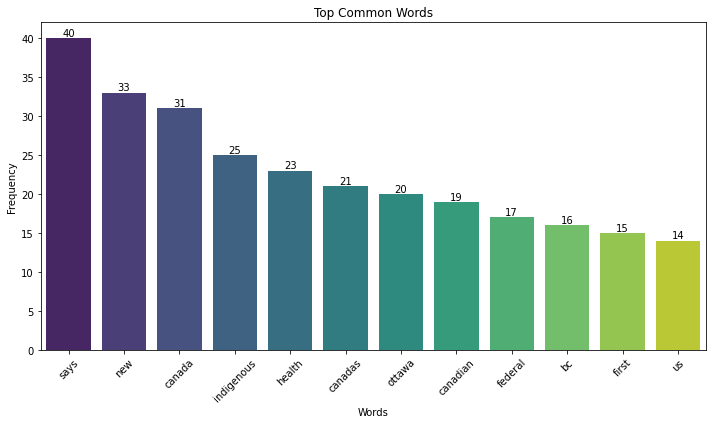

In [137]:
# Extract words and frequencies from words_common
words = [word for word, freq in words_common]
frequencies = [freq for word, freq in words_common]

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=words, y=frequencies, palette='viridis')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top Common Words')
plt.xticks(rotation=45)

# Add value labels on top of each bar
for i, freq in enumerate(frequencies):
    plt.text(i, freq, str(freq), ha='center', va='bottom')

# Adjust plot aesthetics
plt.tight_layout()

# Display the plot
plt.show()


### Plotting Bi-gram and Tri-gram

In [104]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2, 2), max_features=2000)
    bag_of_words = vec1.fit_transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    word_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)
    return word_freq[:n]

In [141]:
top2_words = get_top_n2_words(df_new['Cleaned_news_Data'], n=200)
top2_df = pd.DataFrame(top2_words)
top2_df.columns =["Bi-gram","Frequency"]
top2_df.head()

,Bi-gram,Frequency
0,residential school,7
1,first nations,6
2,school survivors,5
3,small businesses,5
4,politics briefing,5


[Text(0, 0, 'residential school'),
 Text(1, 0, 'first nations'),
 Text(2, 0, 'school survivors'),
 Text(3, 0, 'small businesses'),
 Text(4, 0, 'politics briefing'),
 Text(5, 0, 'taylor swift'),
 Text(6, 0, 'credit card'),
 Text(7, 0, 'bernardo transfer'),
 Text(8, 0, 'parliament hill'),
 Text(9, 0, 'supreme court'),
 Text(10, 0, 'helicopter crash'),
 Text(11, 0, 'social media'),
 Text(12, 0, 'mental health'),
 Text(13, 0, 'wildfire smoke'),
 Text(14, 0, 'air quality'),
 Text(15, 0, 'first nation'),
 Text(16, 0, 'action plan'),
 Text(17, 0, 'foreign interference'),
 Text(18, 0, 'asian infrastructure'),
 Text(19, 0, 'federal byelections')]

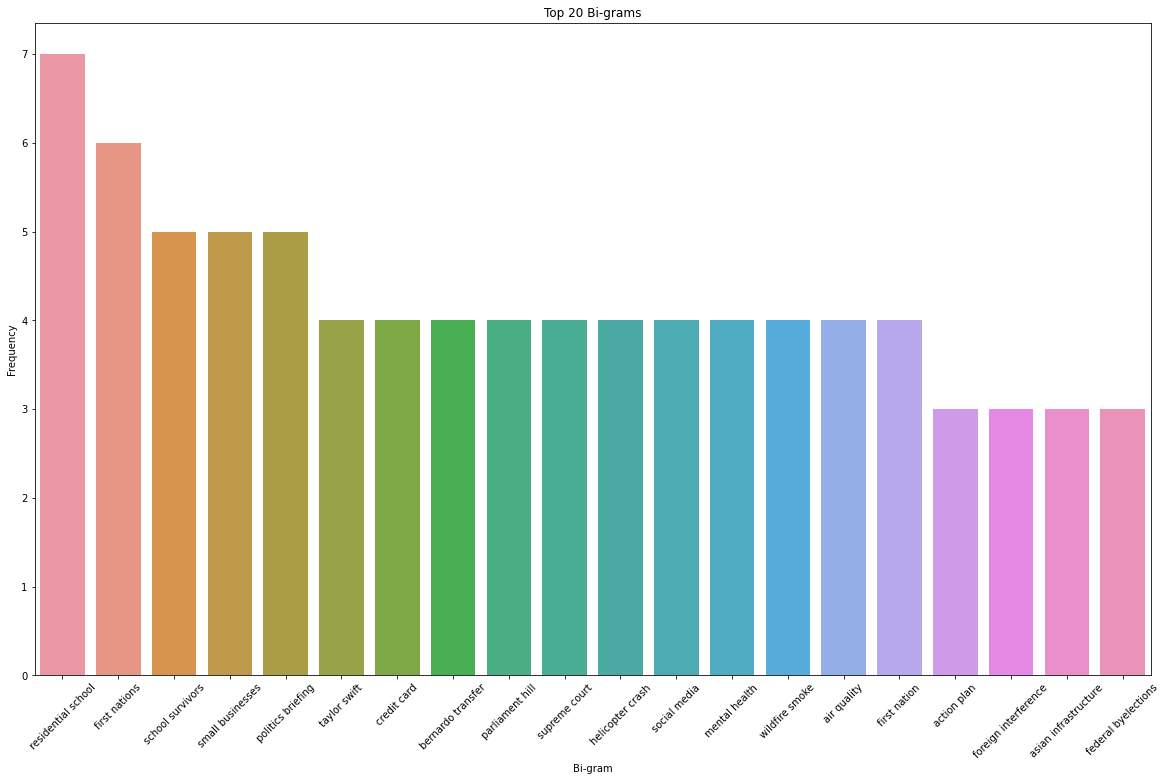

In [145]:
top20_bigram = top2_df.iloc[0:20, :]
fig = plt.figure(figsize=(20, 12))
plt.title('Top 20 Bi-grams')
plot = sns.barplot(x=top20_bigram["Bi-gram"], y=top20_bigram["Frequency"])
plot.set_xticklabels(rotation=45, labels=top20_bigram["Bi-gram"])

In [146]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3, 3), max_features=2000)
    bag_of_words = vec1.fit_transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    word_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)
    return word_freq[:n]

In [147]:
top3_words = get_top_n3_words(df_new['Cleaned_news_Data'], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns =["Tri-gram","Frequency"]
top3_df.head()

,Tri-gram,Frequency
0,residential school survivors,5
1,public safety minister,3
2,poor air quality,3
3,taylor swift saving,2
4,swift saving economy,2


[Text(0, 0, 'residential school survivors'),
 Text(1, 0, 'public safety minister'),
 Text(2, 0, 'poor air quality'),
 Text(3, 0, 'taylor swift saving'),
 Text(4, 0, 'swift saving economy'),
 Text(5, 0, 'giant us subsidies'),
 Text(6, 0, 'us subsidies begin'),
 Text(7, 0, 'subsidies begin luring'),
 Text(8, 0, 'begin luring canadian'),
 Text(9, 0, 'luring canadian clean'),
 Text(10, 0, 'canadian clean tech'),
 Text(11, 0, 'clean tech companies'),
 Text(12, 0, 'tech companies talent'),
 Text(13, 0, 'companies talent move'),
 Text(14, 0, 'talent move south'),
 Text(15, 0, 'ottawa consider windfall'),
 Text(16, 0, 'consider windfall tax'),
 Text(17, 0, 'windfall tax grocery'),
 Text(18, 0, 'tax grocery profits'),
 Text(19, 0, 'grocery profits theyre')]

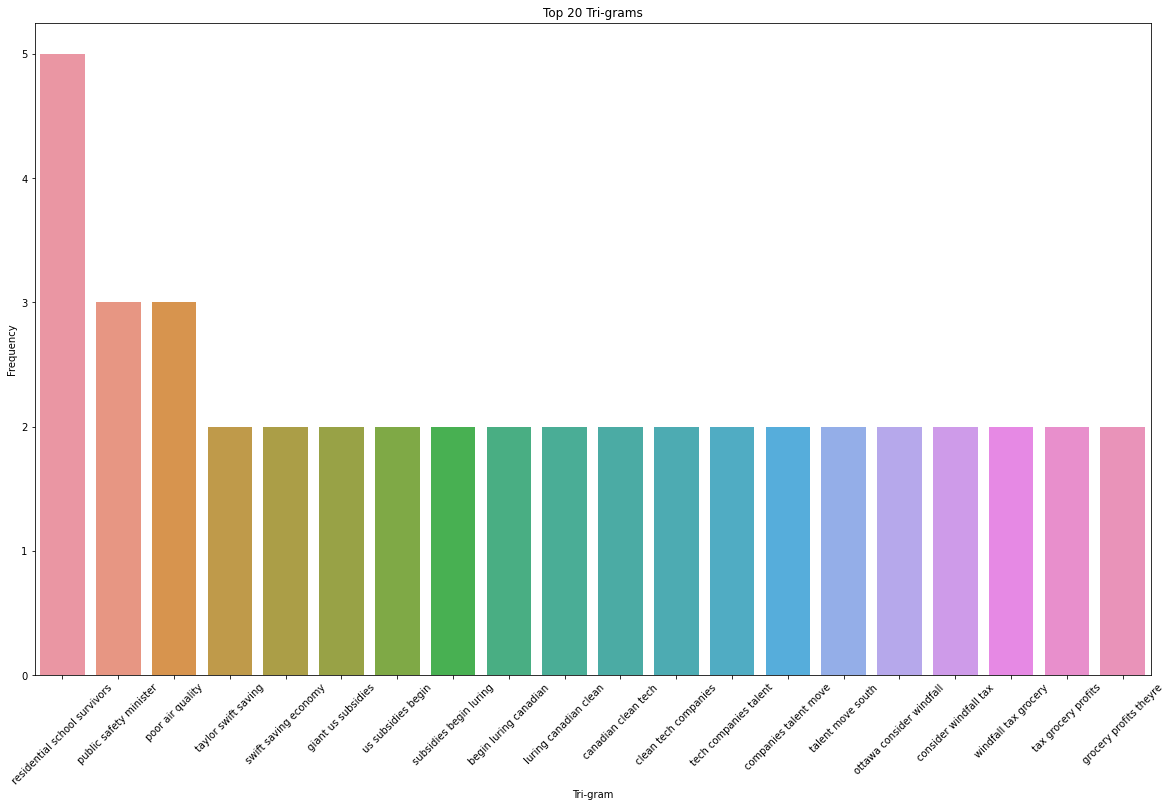

In [152]:
top20_trigram = top3_df.iloc[0:20, :]
fig = plt.figure(figsize=(20, 12))
plt.title('Top 20 Tri-grams')
plot = sns.barplot(x=top20_trigram["Tri-gram"], y=top20_trigram["Frequency"])
plot.set_xticklabels(rotation=45, labels=top20_trigram["Tri-gram"])

In [154]:
string_total = " ".join(df_new['Cleaned_news_Data'])
string_total

'canada bread agrees 50m fine role bread pricefixing scandal taylor swift saving economy student loans keep people trapped debt end sunwing swoop good everyone westjet says consumers arent buying spending slowdown retail sales suggest canadians arent ready quit shopping telus scraps 15 credit card surcharge customer bills largest newspaper chain us sues google monopoly online ads big banks must capital hand cover potential losses new regulator rules giant us subsidies begin luring canadian clean tech companies talent move south westjet shut sunwing airlines merge mainline business td direct deposit system hit technical issues preventing people getting paid swedens inflation rate higher expected kind beyoncés fault lgbtq beer ads old hat despite new troubles bud light ukraine hopes rejuvenate oil gas sector wants canada help ottawa consider windfall tax grocery profits theyre found excessive report ticketmaster announces allin pricing option biden junk fees meeting senate committee urge

 ## 6. Visualization <a class="anchor" id="Visual"></a>


#### Word cloud Visualization
<div class="alert alert-block alert-info">
This is used to visualize the most prominent words in text corpus and they are visually appealing and can easily comvey the importance of particular words in the corpus
</div>

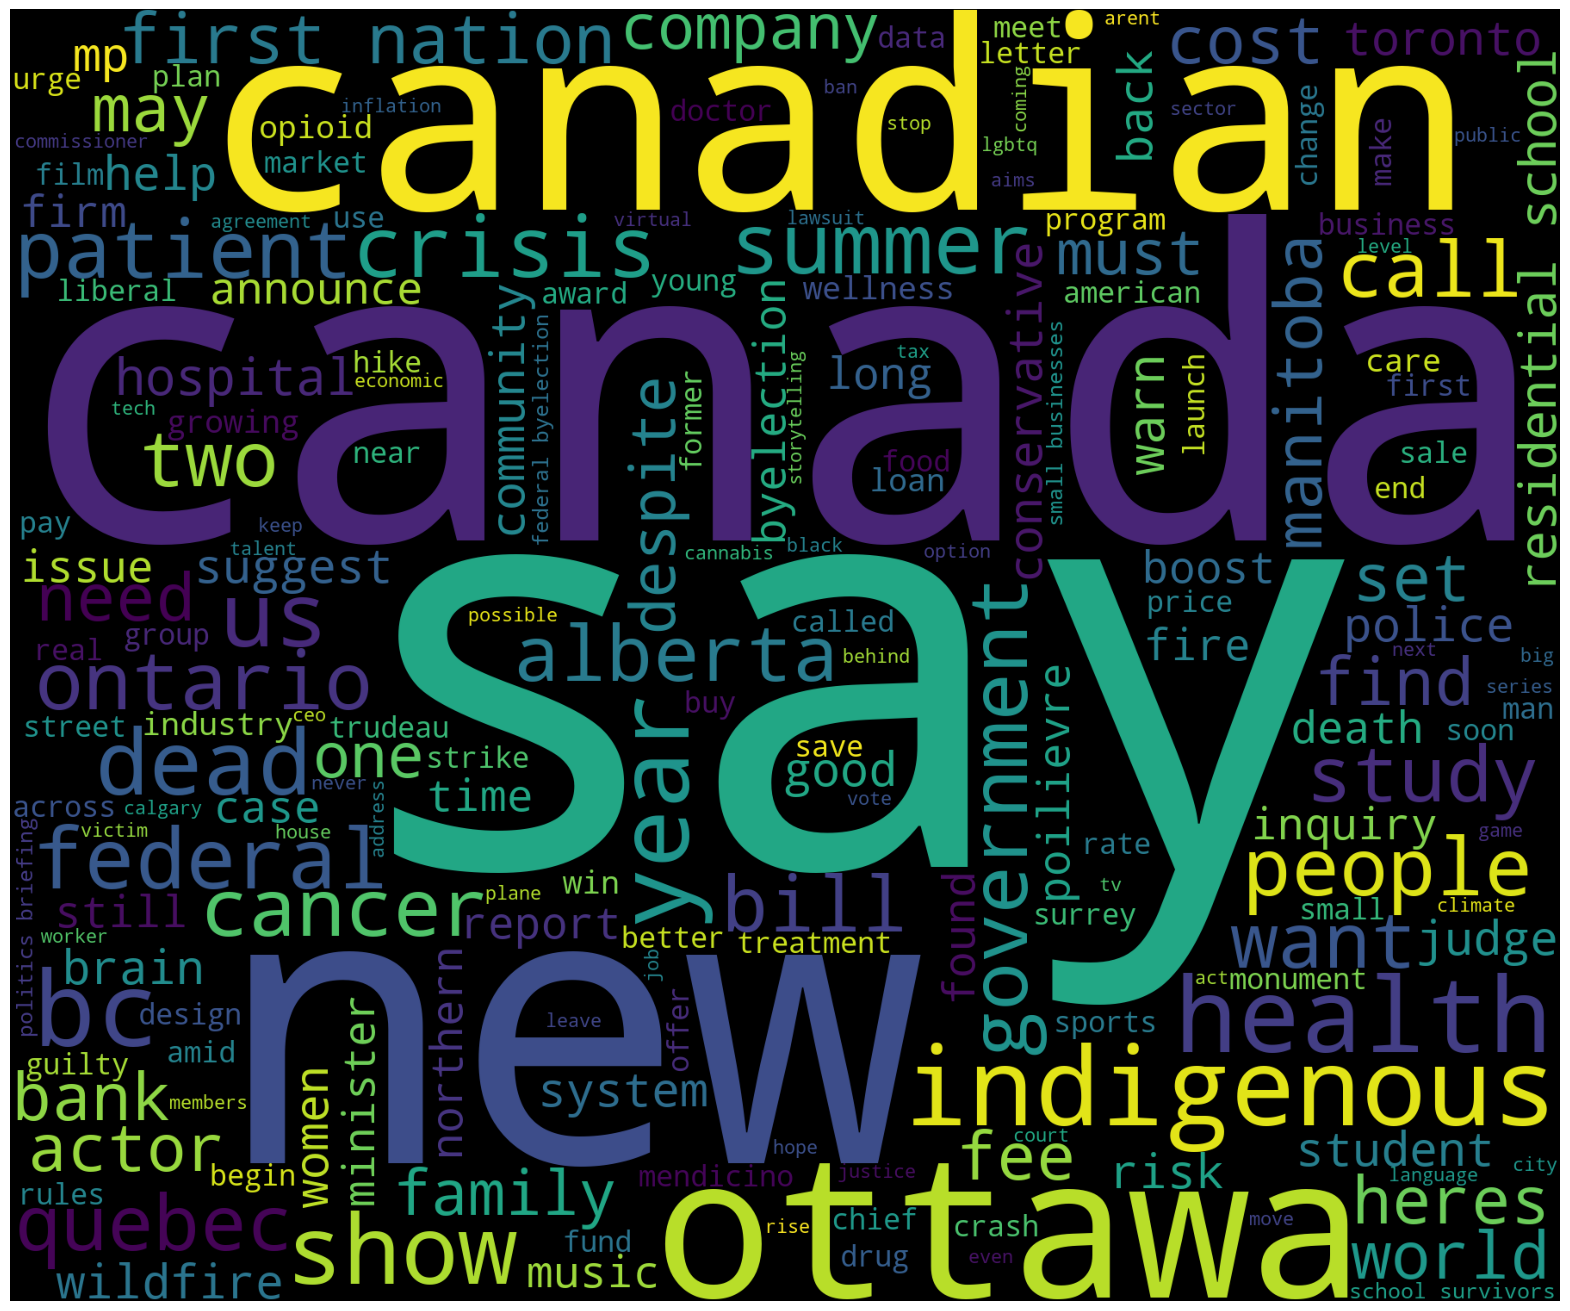

In [36]:
from wordcloud import WordCloud
wordcloud_generator = WordCloud(background_color='black', width=1800, height=1500).generate(' '.join(df_new['Cleaned_news_Data']))
fig = plt.figure(figsize=(20, 20))
plt.imshow(wordcloud_generator)
plt.axis('off')
plt.show()

### News in each category using bar charts
<div class="alert alert-block alert-info">
Using barcharts we have plotted the number of news in each category. These bar charts are very useful when displaying the data in different categories providing a clear magnitude of the categories being compared
</div>

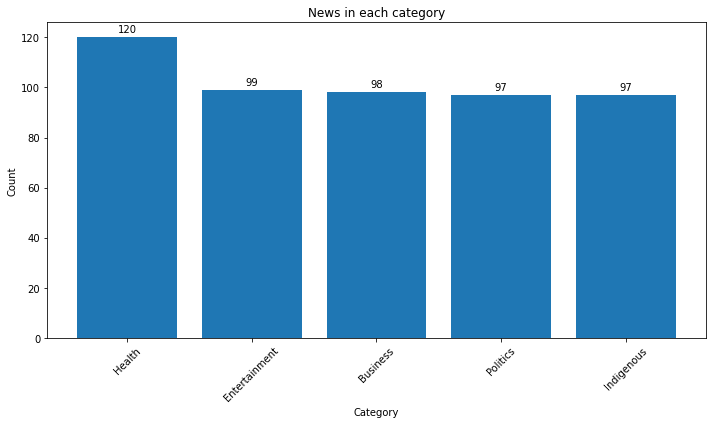

In [155]:
category_counts = df_new['Category'].value_counts()

# Plot the graph
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(category_counts.index, category_counts.values)

# Add labels to the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Set the labels and title
ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.set_title('News in each category')

# Rotate the x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

 ## 7. Training and Testing <a class="anchor" id="Test"></a>

In [250]:
x = df_new['Cleaned_news_Data']
y = df_new['CategoryId']

In [251]:
#using tfidf converting the text data in "Cleaned_news_data" into numerical representation.


vectorizer = TfidfVectorizer(max_features=5000)

x = vectorizer.fit_transform(df_new.Cleaned_news_Data)


In [252]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)

## 8. Modeling <a class="anchor" id="Model"></a>

In [253]:
perform_list = [ ]

In [254]:
#Steamlining the process of running multiple models and printing the performance metrics
def run_model(model_name, est_c, est_pnlty):
    
        #model_name (str): Name of the model to run.
        #est_c: Value for the hyperparameter C (specific to the chosen model).
        #est_pnlty: Value for the penalty hyperparameter (specific to the chosen model).
    

    mdl = None

    if model_name == 'Logistic Regression':
        mdl = LogisticRegression()

    elif model_name == 'Random Forest':
        mdl = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)

    elif model_name == 'Multinomial Naive Bayes':
        mdl = MultinomialNB(alpha=1.0, fit_prior=True)

    elif model_name == 'Support Vector Classifier':
        mdl = SVC()

    oneVsRest = OneVsRestClassifier(mdl)
    oneVsRest.fit(x_train, y_train)
    y_pred = oneVsRest.predict(x_test)

    # Performance metrics
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)

    # Get precision, recall, f1 scores
    precision, recall, f1score, support = score(y_test, y_pred, average='micro')

    print(f'Test Accuracy Score of Basic {model_name}: % {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1-score: {f1score}')
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Create heatmap of confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Add performance parameters to list
    perform_list.append({
        'Model': model_name,
        'Test Accuracy': round(accuracy, 2),
        'Precision': round(precision, 2),
        'Recall': round(recall, 2),
        'F1': round(f1score, 2)
    })


### Logistic Regression
<div class="alert alert-block alert-info">
To avoid overfitting and underfitting we are finding the optimal c value for regularization, the grid searchh with cross validation helps in finding the optimal hyper parameters as below.
    

In [255]:
# Define the parameter grid to search over
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10]
}

# Initialize a LogisticRegression object
model_Logistic = LogisticRegression()

# Create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(model_Logistic, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters found:")
print(grid_search.best_params_)

Best hyperparameters found:
{'C': 10, 'penalty': 'l2'}


Test Accuracy Score of Basic Logistic Regression: % 59.09
Precision: 0.5909090909090909
Recall: 0.5909090909090909
F1-score: 0.5909090909090909


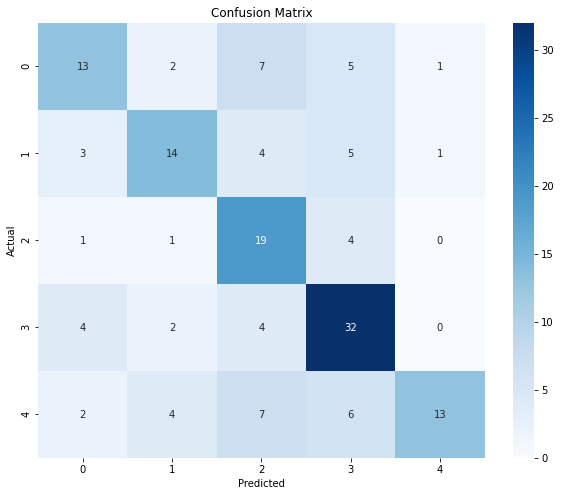

In [256]:
run_model('Logistic Regression', est_c=10, est_pnlty= 'l2')

<div class="alert alert-block alert-info">
The result of Confusion matrix is 5*5 as there are five different categories which are predicted
</div

### Random Forest

Test Accuracy Score of Basic Random Forest: % 61.69
Precision: 0.6168831168831169
Recall: 0.6168831168831169
F1-score: 0.6168831168831169


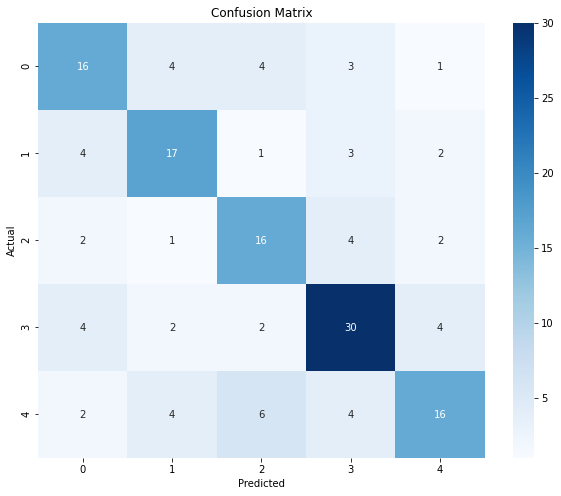

In [263]:
run_model('Random Forest', est_c=None, est_pnlty=None)

### Multinominal Naive bayes

Test Accuracy Score of Basic Multinomial Naive Bayes: % 62.34
Precision: 0.6233766233766234
Recall: 0.6233766233766234
F1-score: 0.6233766233766234


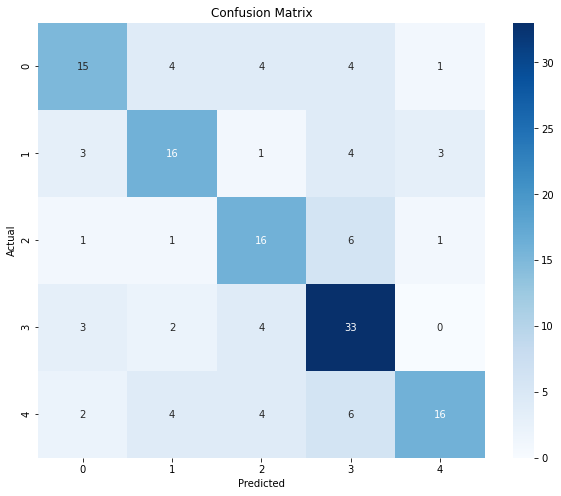

In [258]:
run_model('Multinomial Naive Bayes', est_c=None, est_pnlty= None)

### Support Vector Classifier

Test Accuracy Score of Basic Support Vector Classifier: % 61.04
Precision: 0.6103896103896104
Recall: 0.6103896103896104
F1-score: 0.6103896103896104


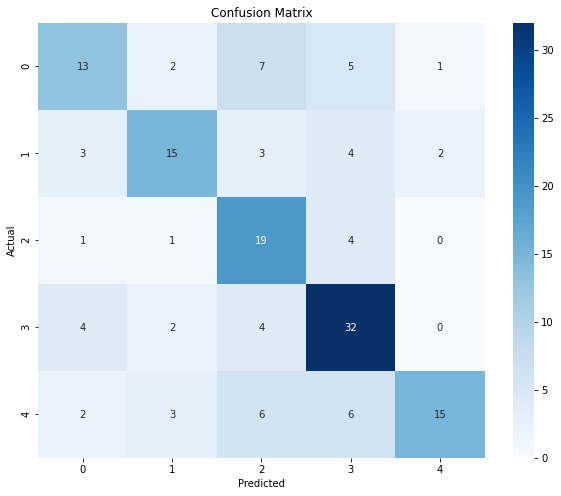

In [259]:
run_model('Support Vector Classifier',est_c=None, est_pnlty= None)

<div class="alert alert-block alert-info">
In the modeling for Random forest,multinominal naive bayes, support vector classifier we haven't used any hyper parameter for tuning just to compare with other models like how models performed with hyperparameter and without hyper parameters, As a future work we will get the best hyper parameters for each model and implement those.
</div>

## 9. Verifying the Results <a class="anchor" id="Result"></a>

In [260]:
model_performance = pd.DataFrame(data=perform_list)
model_performance = model_performance[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
model_performance

,Model,Test Accuracy,Precision,Recall,F1
0,Logistic Regression,59.09,0.59,0.59,0.59
1,Random Forest,61.69,0.62,0.62,0.62
2,Multinomial Naive Bayes,62.34,0.62,0.62,0.62
3,Support Vector Classifier,61.04,0.61,0.61,0.61


In [264]:
#Best performing model
model = model_performance["Model"]
max_value = model_performance["Test Accuracy"].max()
print("The best accuracy of model is", max_value)

The best accuracy of model is 62.34


<div class="alert alert-block alert-info">
As the MultinominaNB is best performing model, we used hyperparameters to setup the model. We have give a text to see if the model is predciting the category correctly
</div

In [265]:
classifier = MultinomialNB(alpha=1.0,fit_prior=True).fit(x_train, y_train)
classifier
y_pred = classifier.predict(x_test)

In [199]:
y_pred1 = cv.transform(["Osteoporosis is a silent disease. Here's what experts say about how to prevent it"])
yy = classifier.predict(y_pred1)
result = ""
if yy == [0]:
  result = "Business News"
elif yy == [1]:
  result = "Politics News"
elif yy == [2]:
  result = "Entertainment News"
elif yy == [3]:
  result = "Science News"
elif yy == [4]:
  result = "Health News"
elif yy == [5]:
  result = "Indigenous News"
print(result)

Science News


In [200]:
y_pred1 = cv.transform(["A phone was thrown at Bebe Rexha during NYC concert. It's not the first time this has happened"])
yy = classifier.predict(y_pred1)
result = ""
if yy == [0]:
  result = "Business News"
elif yy == [1]:
  result = "Politics News"
elif yy == [2]:
  result = "Entertainment News"
elif yy == [3]:
  result = "Science News"
elif yy == [4]:
  result = "Health News"
elif yy == [5]:
  result = "Indigenous News"
print(result)

Entertainment News
